# Motion with initial velocity <a class='tocSkip'></a>

Thomas Schanzer z5310829  
School of Physics, UNSW  
September 2021

In this notebook, we give the parcels some nonzero initial velocity and compare their motion to the zero-initial-velocity case.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dry-regime" data-toc-modified-id="Dry-regime-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dry regime</a></span><ul class="toc-item"><li><span><a href="#Velocity-at-ground-impact" data-toc-modified-id="Velocity-at-ground-impact-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Velocity at ground impact</a></span></li><li><span><a href="#Time-to-reach-ground" data-toc-modified-id="Time-to-reach-ground-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Time to reach ground</a></span></li><li><span><a href="#Minimum-height" data-toc-modified-id="Minimum-height-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Minimum height</a></span></li><li><span><a href="#Time-to-reach-minimum-height" data-toc-modified-id="Time-to-reach-minimum-height-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Time to reach minimum height</a></span></li></ul></li><li><span><a href="#Saturated-regime" data-toc-modified-id="Saturated-regime-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Saturated regime</a></span><ul class="toc-item"><li><span><a href="#Velocity-at-ground-impact" data-toc-modified-id="Velocity-at-ground-impact-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Velocity at ground impact</a></span></li><li><span><a href="#Time-to-reach-ground" data-toc-modified-id="Time-to-reach-ground-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Time to reach ground</a></span></li><li><span><a href="#Minimum-height" data-toc-modified-id="Minimum-height-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Minimum height</a></span></li><li><span><a href="#Time-to-reach-minimum-height" data-toc-modified-id="Time-to-reach-minimum-height-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Time to reach minimum height</a></span></li></ul></li><li><span><a href="#Limited-regime" data-toc-modified-id="Limited-regime-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Limited regime</a></span><ul class="toc-item"><li><span><a href="#Velocity-at-ground-impact" data-toc-modified-id="Velocity-at-ground-impact-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Velocity at ground impact</a></span></li><li><span><a href="#Time-to-reach-ground" data-toc-modified-id="Time-to-reach-ground-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Time to reach ground</a></span></li><li><span><a href="#Minimum-height" data-toc-modified-id="Minimum-height-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Minimum height</a></span></li><li><span><a href="#Time-to-reach-minimum-height" data-toc-modified-id="Time-to-reach-minimum-height-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Time to reach minimum height</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
import metpy.constants as const
from metpy.units import units
from metpy.units import concatenate
from metpy.plots import SkewT
from pint import UnitRegistry, set_application_registry

from scipy.optimize import root_scalar

from os import mkdir
from os.path import exists
import sys
import shelve

sys.path.append('../../scripts/')
from environment import Environment

In [17]:
set_application_registry(units)
fig_path = ('20210928_motion_with_initial_velocity_figures/')
if not exists(fig_path):
    mkdir(fig_path)
data_filename = '20210928_motion_with_initial_velocity_data'
zero_velocity_data_filename = (
    '../20210922_sounding_comparisons/20210922_sounding_comparisons_data')

In [7]:
file = '../../soundings/SYDNEY AIRPORT (94767) 12 Nov 2019 00Z.txt'
sounding = pd.read_csv(
    file, names=['pressure', 'temperature', 'dewpoint'],
    usecols=[0, 2, 3], header=0)
sounding = sounding.to_numpy()
pressure = sounding[:,0]*units.mbar
temperature = sounding[:,1]*units.celsius
dewpoint = sounding[:,2]*units.celsius
sydney = Environment(
    pressure, temperature, dewpoint,
    info='SYDNEY AIRPORT (94767) 12 Nov 2019 00Z', name='Sydney')

file = '../../soundings/48698 WSSS Singapore Observations at 00Z 02 Sep 2021.txt'
sounding = pd.read_fwf(
    file, names=['pressure', 'temperature', 'dewpoint'],
    usecols=[0, 2, 3], header=1)
sounding = sounding.to_numpy()
pressure = sounding[:,0]*units.mbar
temperature = sounding[:,1]*units.celsius
dewpoint = sounding[:,2]*units.celsius
singapore = Environment(
    pressure, temperature, dewpoint,
    info='48698 WSSS Singapore Observations at 00Z 02 Sep 2021',
    name='Singapore')

file = ('../../soundings/41217 OMAA Abu Dhabi Inter Arpt Observations at '
        '12Z 20 Sep 2021.txt')
sounding = pd.read_fwf(
    file, names=['pressure', 'temperature', 'dewpoint'],
    usecols=[0, 2, 3], header=1)
sounding = sounding.to_numpy()
pressure = sounding[:,0]*units.mbar
temperature = sounding[:,1]*units.celsius
dewpoint = sounding[:,2]*units.celsius
abu_dhabi = Environment(
    pressure, temperature, dewpoint,
    info='41217 OMAA Abu Dhabi Inter Arpt Observations at 12Z 20 Sep 2021',
    name='Abu Dhabi')

file = ('../../soundings/89564 Mawson Observations at 12Z 21 Sep 2021.txt')
sounding = pd.read_fwf(
    file, names=['pressure', 'temperature', 'dewpoint'],
    usecols=[0, 2, 3], header=1)
sounding = sounding.to_numpy()
pressure = sounding[:,0]*units.mbar
temperature = sounding[:,1]*units.celsius
dewpoint = sounding[:,2]*units.celsius
mawson = Environment(
    pressure, temperature, dewpoint,
    info='89564 Mawson Observations at 12Z 21 Sep 2021', name='Mawson')

In [134]:
# save sounding objects to file
with shelve.open(data_filename) as file:
    for sounding in [sydney, singapore, abu_dhabi, mawson]:
        file[sounding.name] = sounding
    print(list(file.keys()))

['Abu Dhabi', 'Mawson', 'Singapore', 'Sydney']


In [ ]:
# retrieve sounding objects from file
with shelve.open(data_filename) as file:
    sydney = file['Sydney']
    singapore = file['Singapore']
    abu_dhabi = file['Abu Dhabi']
    mawson = file['Mawson']

## Dry regime

In [10]:
initial_velocity_down = {}
initial_height = 3*units.km
initial_velocity = -1*units.meter/units.second
dq = {}
time = np.arange(0, 9*60, 15)*units.second
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    max_dq = sounding.maximum_specific_humidity_change(initial_height)
    dq[sounding.name] = np.arange(0, max_dq*1.001, max_dq/40)
    initial_height_array = np.ones(
        len(dq[sounding.name]))*initial_height
    initial_velocity_array = np.ones(
        len(dq[sounding.name]))*initial_velocity
    initial_velocity_down[sounding.name] = sounding.modified_motion(
        time, initial_height_array, initial_velocity_array, dq[sounding.name],
        regime='dry')
    sys.stdout.write('\n')

Calculating for Sydney:
Calculating profile 41 of 41.   
Calculating for Singapore:
Calculating profile 41 of 41.   
Calculating for Abu Dhabi:
Calculating profile 41 of 41.   
Calculating for Mawson:
Calculating profile 41 of 41.   


In [144]:
# save to file
with shelve.open(data_filename) as file:
    file['dry_motion_3km_down'] = {
        'dq': dq, 'time': time, 'motion': initial_velocity_down,
        'initial_velocity': -1*units.meter/units.second}
    print(list(file.keys()))

['dry_motion_3km_down', 'Singapore', 'Sydney', 'Abu Dhabi', 'Mawson']


In [13]:
# retrieve from file
with shelve.open(data_filename) as file:
    dq = file['dry_motion_3km_down']['dq']
    time = file['dry_motion_3km_down']['time']
    initial_velocity_down = file['dry_motion_3km_down']['motion']

In [14]:
initial_velocity_up = {}
initial_height = 3*units.km
initial_velocity = 1*units.meter/units.second
dq = {}
time = np.arange(0, 9*60, 15)*units.second
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    max_dq = sounding.maximum_specific_humidity_change(initial_height)
    dq[sounding.name] = np.arange(0, max_dq*1.001, max_dq/40)
    initial_height_array = np.ones(
        len(dq[sounding.name]))*initial_height
    initial_velocity_array = np.ones(
        len(dq[sounding.name]))*initial_velocity
    initial_velocity_up[sounding.name] = sounding.modified_motion(
        time, initial_height_array, initial_velocity_array, dq[sounding.name],
        regime='dry')
    sys.stdout.write('\n')

Calculating for Sydney:
Calculating profile 41 of 41.   
Calculating for Singapore:
Calculating profile 41 of 41.   
Calculating for Abu Dhabi:
Calculating profile 41 of 41.   
Calculating for Mawson:
Calculating profile 41 of 41.   


In [147]:
# save to file
with shelve.open(data_filename) as file:
    file['dry_motion_3km_up'] = {
        'dq': dq, 'time': time, 'motion': initial_velocity_up,
        'initial_velocity': 1*units.meter/units.second}
    print(list(file.keys()))

['dry_motion_3km_down', 'Singapore', 'Sydney', 'Abu Dhabi', 'dry_motion_3km_up', 'Mawson']


In [ ]:
# retrieve from file
with shelve.open(data_filename) as file:
    dq = file['dry_motion_3km_+1m/s']['dq']
    time = file['dry_motion_3km_+1m/s']['time']
    initial_velocity_up = file['dry_motion_3km_+1m/s']['motion']

In [18]:
# zero velocity data
with shelve.open(zero_velocity_data_filename) as file:
    initial_velocity_zero = file['dry_motion_3km']['dry_motion_3km']

### Velocity at ground impact

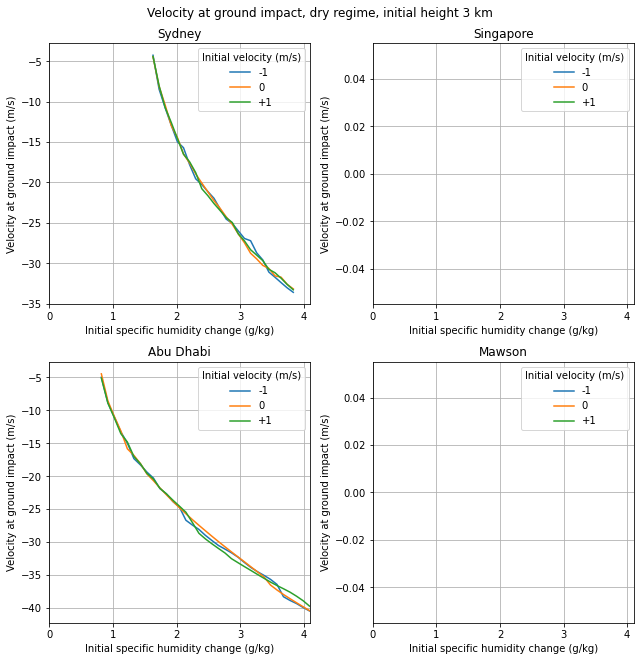

In [51]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_down[sounding.name].hit_ground_velocity,
        label='-1')
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_zero[sounding.name].hit_ground_velocity,
        label='0')
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_up[sounding.name].hit_ground_velocity,
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(0, 4.1)
    ax.set(
        xlabel='Initial specific humidity change (g/kg)',
        ylabel='Velocity at ground impact (m/s)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Velocity at ground impact, dry regime, initial height 3 km', y=1.015)
fig.savefig(
    fig_path + 'dry_ground_impact_velocity_3km_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

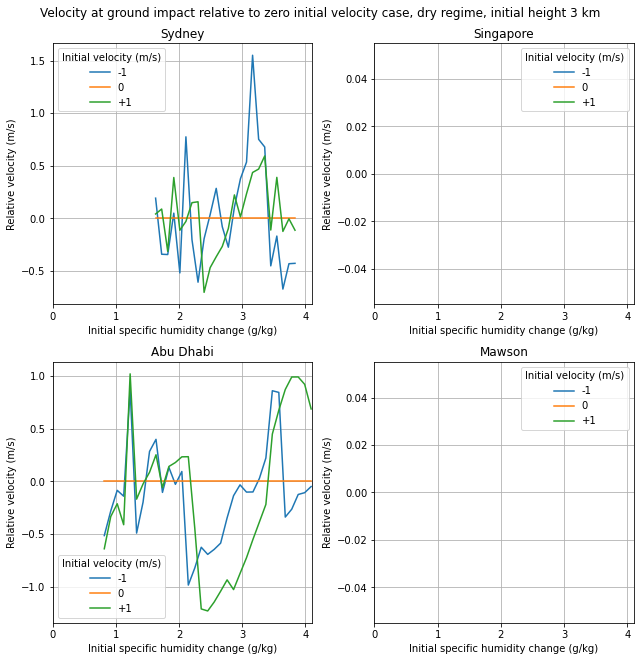

In [77]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        dq[sounding.name]*1e3,
        (initial_velocity_down[sounding.name].hit_ground_velocity
         - initial_velocity_zero[sounding.name].hit_ground_velocity),
        label='-1')
    ax.plot(
        dq[sounding.name]*1e3,
        (initial_velocity_zero[sounding.name].hit_ground_velocity
         - initial_velocity_zero[sounding.name].hit_ground_velocity),
        label='0')
    ax.plot(
        dq[sounding.name]*1e3,
        (initial_velocity_up[sounding.name].hit_ground_velocity
         - initial_velocity_zero[sounding.name].hit_ground_velocity),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(0, 4.1)
    ax.set(
        xlabel='Initial specific humidity change (g/kg)',
        ylabel='Relative velocity (m/s)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Velocity at ground impact relative to zero initial velocity case, '
    'dry regime, initial height 3 km', y=1.015)
fig.savefig(
    fig_path + 'dry_ground_impact_velocity_3km_comparison_relative.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

### Time to reach ground

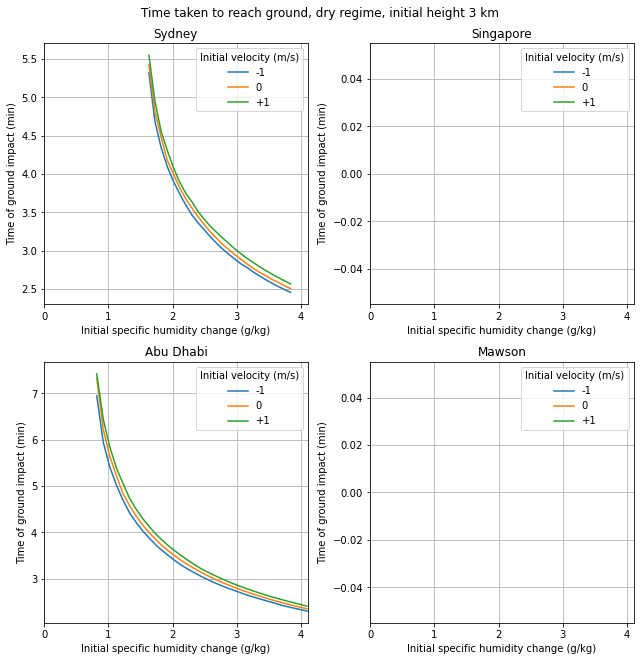

In [55]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_down[sounding.name].hit_ground_time.to(units.min),
        label='-1')
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_zero[sounding.name].hit_ground_time.to(units.min),
        label='0')
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_up[sounding.name].hit_ground_time.to(units.min),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(0, 4.1)
    ax.set(
        xlabel='Initial specific humidity change (g/kg)',
        ylabel='Time of ground impact (min)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Time taken to reach ground, dry regime, initial height 3 km', y=1.015)
fig.savefig(
    fig_path + 'dry_ground_impact_time_3km_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

### Minimum height

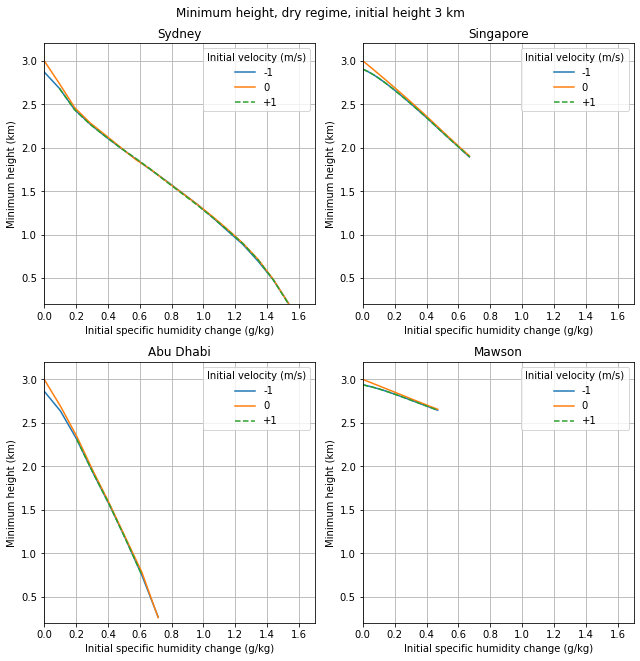

In [73]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_down[sounding.name].min_height.to(units.km),
        label='-1')
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_zero[sounding.name].min_height.to(units.km),
        label='0')
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_up[sounding.name].min_height.to(units.km), '--',
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(0, 1.7)
    ax.set_ylim(0.2, 3.2)
    ax.set(
        xlabel='Initial specific humidity change (g/kg)',
        ylabel='Minimum height (km)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Minimum height, dry regime, initial height 3 km',
    y=1.015)
fig.savefig(
    fig_path + 'dry_min_height_3km_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

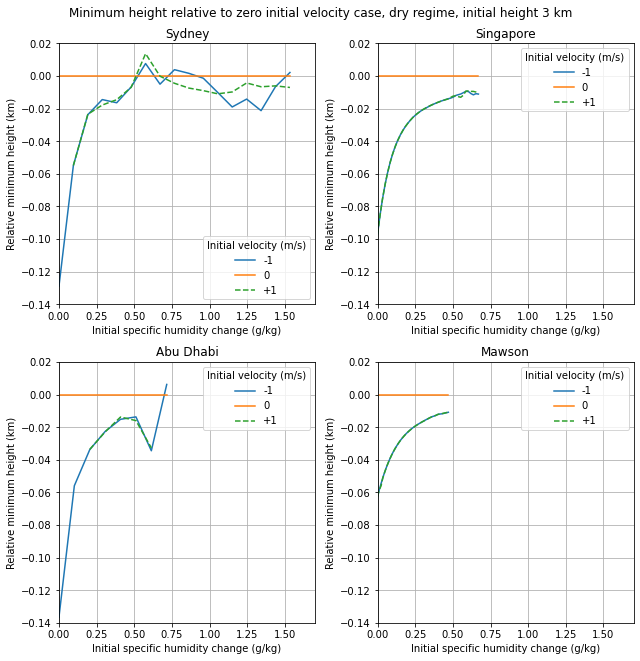

In [78]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        dq[sounding.name]*1e3,
        (initial_velocity_down[sounding.name].min_height.to(units.km)
         - initial_velocity_zero[sounding.name].min_height.to(units.km)),
        label='-1')
    ax.plot(
        dq[sounding.name]*1e3,
        (initial_velocity_zero[sounding.name].min_height.to(units.km)
         - initial_velocity_zero[sounding.name].min_height.to(units.km)),
        label='0')
    ax.plot(
        dq[sounding.name]*1e3,
        (initial_velocity_up[sounding.name].min_height.to(units.km)
         - initial_velocity_zero[sounding.name].min_height.to(units.km)), '--',
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(0, 1.7)
    ax.set_ylim(-0.14, 0.02)
    ax.set(
        xlabel='Initial specific humidity change (g/kg)',
        ylabel='Relative minimum height (km)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Minimum height relative to zero initial velocity case, dry regime, '
    'initial height 3 km', y=1.015)
fig.savefig(
    fig_path + 'dry_min_height_3km_comparison_relative.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

### Time to reach minimum height

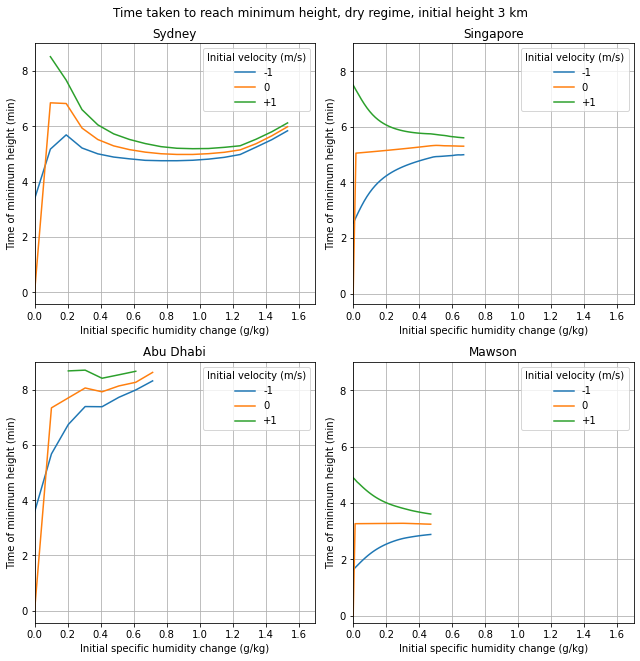

In [61]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_down[sounding.name].min_height_time.to(units.min),
        label='-1')
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_zero[sounding.name].min_height_time.to(units.min),
        label='0')
    ax.plot(
        dq[sounding.name]*1e3,
        initial_velocity_up[sounding.name].min_height_time.to(units.min),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(0, 1.7)
    ax.set_ylim(top=9)
    ax.set(
        xlabel='Initial specific humidity change (g/kg)',
        ylabel='Time of minimum height (min)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Time taken to reach minimum height, dry regime, initial height 3 km',
    y=1.015)
fig.savefig(
    fig_path + 'dry_min_height_time_3km_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

## Saturated regime

In [150]:
initial_velocity_down = {}
initial_height = np.arange(0, 10.01, 0.1)*units.km
initial_velocity = np.ones(len(initial_height))*-1*units.meter/units.second
time = np.arange(0, 17*60, 20)*units.second
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    initial_velocity_down[sounding.name] = sounding.modified_motion(
        time, initial_height, initial_velocity, regime='saturated')
    sys.stdout.write('\n')

Calculating for Sydney:
Calculating profile 101 of 101.   
Calculating for Singapore:
Calculating profile 101 of 101.   
Calculating for Abu Dhabi:
Calculating profile 101 of 101.   
Calculating for Mawson:
Calculating profile 101 of 101.   


In [151]:
# save to file
with shelve.open(data_filename) as file:
    file['saturated_motion_down'] = {
        'initial_height': initial_height, 'time': time,
        'initial_velocity': initial_velocity, 'motion': initial_velocity_down}
    print(list(file.keys()))

['dry_motion_3km_down', 'Singapore', 'Sydney', 'Abu Dhabi', 'dry_motion_3km_up', 'Mawson', 'saturated_motion_down']


In [ ]:
# retrieve from file
with shelve.open(data_filename) as file:
    initial_height = file['saturated_motion_down']['initial_height']
    time = file['saturated_motion_down']['time']
    initial_velocity_down = \
        file['saturated_motion_down']['motion']    

In [152]:
initial_velocity_up = {}
initial_height = np.arange(0, 10.01, 0.1)*units.km
initial_velocity = np.ones(len(initial_height))*1*units.meter/units.second
time = np.arange(0, 17*60, 20)*units.second
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    initial_velocity_up[sounding.name] = sounding.modified_motion(
        time, initial_height, initial_velocity, regime='saturated')
    sys.stdout.write('\n')

Calculating for Sydney:
Calculating profile 101 of 101.   
Calculating for Singapore:
Calculating profile 101 of 101.   
Calculating for Abu Dhabi:
Calculating profile 101 of 101.   
Calculating for Mawson:
Calculating profile 101 of 101.   


In [153]:
# save to file
with shelve.open(data_filename) as file:
    file['saturated_motion_up'] = {
        'initial_height': initial_height, 'time': time,
        'initial_velocity': initial_velocity, 'motion': initial_velocity_up}
    print(list(file.keys()))

['dry_motion_3km_down', 'saturated_motion_up', 'Singapore', 'Sydney', 'Abu Dhabi', 'dry_motion_3km_up', 'Mawson', 'saturated_motion_down']


In [ ]:
# retrieve from file
with shelve.open(data_filename) as file:
    initial_height = file['saturated_motion_up']['initial_height']
    time = file['saturated_motion_up']['time']
    initial_velocity_up = \
        file['saturated_motion_up']['motion']    

In [154]:
# zero velocity data
with shelve.open(zero_velocity_data_filename) as file:
    initial_velocity_zero = file['saturated_motion']['saturated_motion']
    zero_time = file['saturated_motion']['time']

### Velocity at ground impact

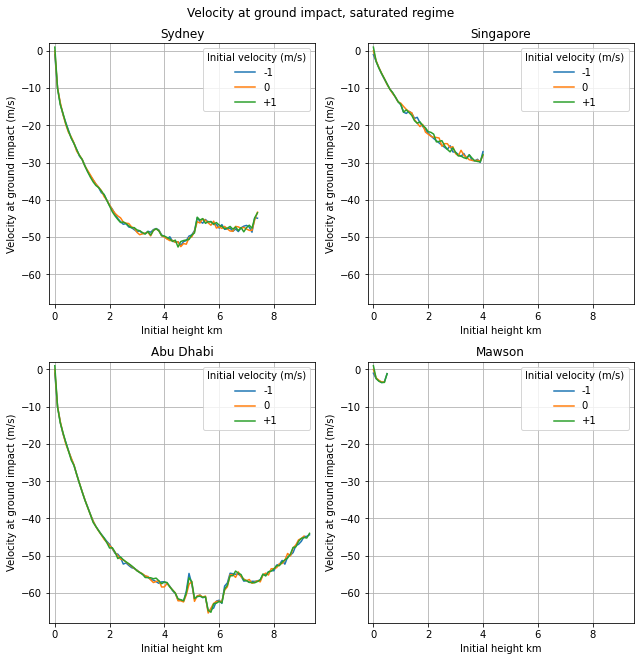

In [173]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        initial_height,
        initial_velocity_down[sounding.name].hit_ground_velocity,
        label='-1')
    ax.plot(
        initial_height,
        initial_velocity_zero[sounding.name].hit_ground_velocity,
        label='0')
    ax.plot(
        initial_height,
        initial_velocity_up[sounding.name].hit_ground_velocity,
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set(
        xlabel='Initial height km',
        ylabel='Velocity at ground impact (m/s)',
        title=sounding.name)
    ax.set_xlim(-0.2, 9.5)
    ax.set_ylim(-68, 2)
    ax.grid()
fig.tight_layout()
fig.suptitle('Velocity at ground impact, saturated regime', y=1.015)
fig.savefig(
    fig_path + 'saturated_ground_impact_velocity_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

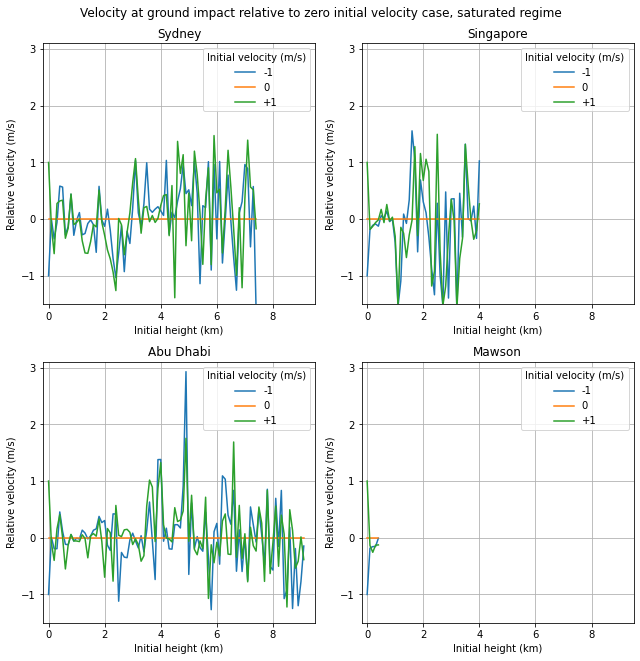

In [175]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        initial_height,
        (initial_velocity_down[sounding.name].hit_ground_velocity
         - initial_velocity_zero[sounding.name].hit_ground_velocity),
        label='-1')
    ax.plot(
        initial_height,
        (initial_velocity_zero[sounding.name].hit_ground_velocity
         - initial_velocity_zero[sounding.name].hit_ground_velocity),
        label='0')
    ax.plot(
        initial_height,
        (initial_velocity_up[sounding.name].hit_ground_velocity
         - initial_velocity_zero[sounding.name].hit_ground_velocity),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(-0.2, 9.5)
    ax.set_ylim(-1.5, 3.1)
    ax.set(
        xlabel='Initial height (km)',
        ylabel='Relative velocity (m/s)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Velocity at ground impact relative to zero initial velocity case, '
    'saturated regime', y=1.015)
fig.savefig(
    fig_path + 'saturated_ground_impact_velocity_comparison_relative.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

### Time to reach ground

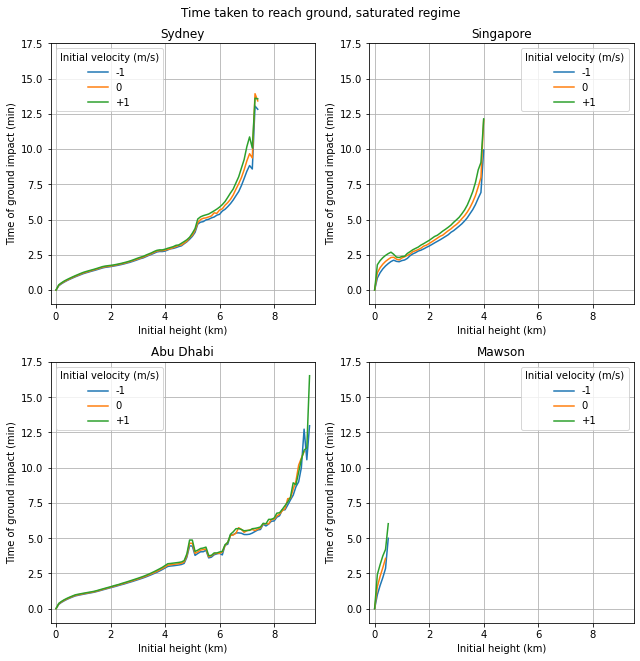

In [177]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        initial_height,
        initial_velocity_down[sounding.name].hit_ground_time.to(units.min),
        label='-1')
    ax.plot(
        initial_height,
        initial_velocity_zero[sounding.name].hit_ground_time.to(units.min),
        label='0')
    ax.plot(
        initial_height,
        initial_velocity_up[sounding.name].hit_ground_time.to(units.min),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_ylim(-1, 17.5)
    ax.set_xlim(-0.2, 9.5)
    ax.set(
        xlabel='Initial height (km)',
        ylabel='Time of ground impact (min)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle('Time taken to reach ground, saturated regime', y=1.015)
fig.savefig(
    fig_path + 'saturated_ground_impact_time_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

### Minimum height

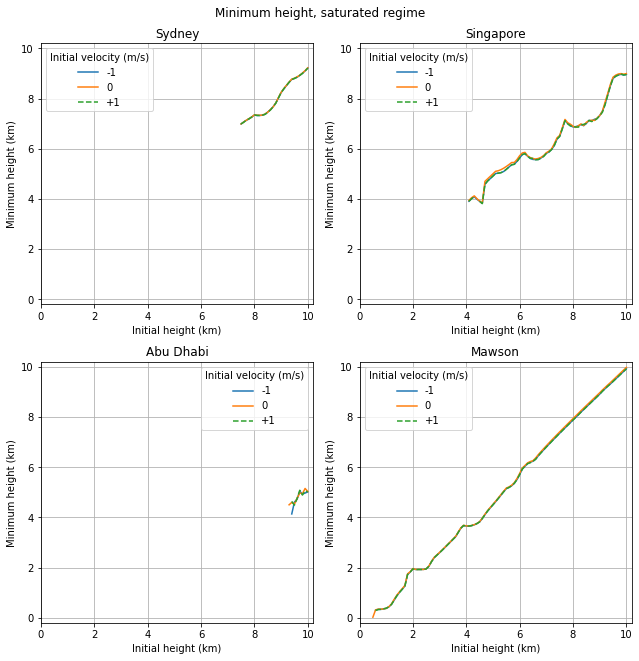

In [180]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        initial_height,
        initial_velocity_down[sounding.name].min_height.to(units.km),
        label='-1')
    ax.plot(
        initial_height,
        initial_velocity_zero[sounding.name].min_height.to(units.km),
        label='0')
    ax.plot(
        initial_height,
        initial_velocity_up[sounding.name].min_height.to(units.km), '--',
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(0, 10.2)
    ax.set_ylim(-0.2, 10.2)
    ax.set(
        xlabel='Initial height (km)',
        ylabel='Minimum height (km)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Minimum height, saturated regime',
    y=1.015)
fig.savefig(
    fig_path + 'saturated_min_height_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

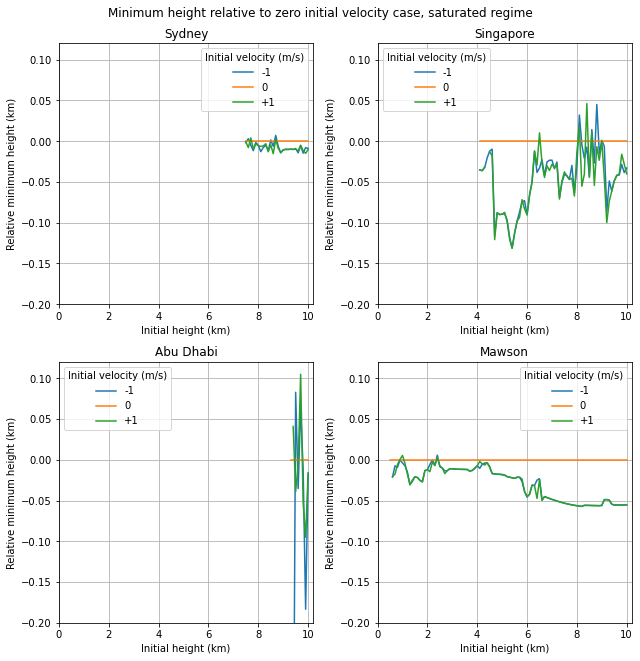

In [184]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        initial_height,
        (initial_velocity_down[sounding.name].min_height.to(units.km)
         - initial_velocity_zero[sounding.name].min_height.to(units.km)),
        label='-1')
    ax.plot(
        initial_height,
        (initial_velocity_zero[sounding.name].min_height.to(units.km)
         - initial_velocity_zero[sounding.name].min_height.to(units.km)),
        label='0')
    ax.plot(
        initial_height,
        (initial_velocity_up[sounding.name].min_height.to(units.km)
         - initial_velocity_zero[sounding.name].min_height.to(units.km)),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(0, 10.2)
    ax.set_ylim(-0.2, 0.12)
    ax.set(
        xlabel='Initial height (km)',
        ylabel='Relative minimum height (km)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Minimum height relative to zero initial velocity case, saturated regime',
    y=1.015)
fig.savefig(
    fig_path + 'saturated_min_height_comparison_relative.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

### Time to reach minimum height

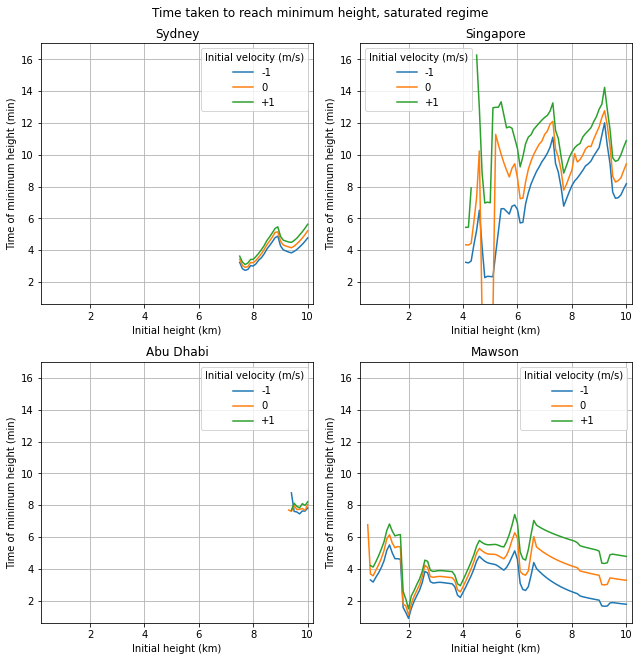

In [189]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        initial_height,
        initial_velocity_down[sounding.name].min_height_time.to(units.min),
        label='-1')
    ax.plot(
        initial_height,
        initial_velocity_zero[sounding.name].min_height_time.to(units.min),
        label='0')
    ax.plot(
        initial_height,
        initial_velocity_up[sounding.name].min_height_time.to(units.min),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(0.2, 10.2)
    ax.set_ylim(0.6, 17)
    ax.set(
        xlabel='Initial height (km)',
        ylabel='Time of minimum height (min)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Time taken to reach minimum height, saturated regime',
    y=1.015)
fig.savefig(
    fig_path + 'saturated_min_height_time_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

## Limited regime

In [190]:
initial_velocity_down = {}
liquid_ratio = np.arange(0, 5.01e-3, 0.125e-3)
initial_height = np.ones(len(liquid_ratio))*3*units.km
initial_velocity = np.ones(len(liquid_ratio))*-1*units.meter/units.second
time = np.arange(0, 7*60, 10)*units.second
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    initial_velocity_down[sounding.name] = sounding.modified_motion(
        time, initial_height, initial_velocity, liquid_ratio, regime='limited')
    sys.stdout.write('\n')

Calculating for Sydney:
Calculating profile 41 of 41.   
Calculating for Singapore:
Calculating profile 41 of 41.   
Calculating for Abu Dhabi:
Calculating profile 41 of 41.   
Calculating for Mawson:
Calculating profile 41 of 41.   


In [191]:
# save to file
with shelve.open(data_filename) as file:
    file['limited_motion_3km_down'] = {
        'liquid_ratio': liquid_ratio, 'time': time,
        'motion': initial_velocity_down,
        'initial_velocity': -1*units.meter/units.second}
    print(list(file.keys()))

['dry_motion_3km_down', 'saturated_motion_up', 'Singapore', 'Sydney', 'limited_motion_3km_down', 'Abu Dhabi', 'dry_motion_3km_up', 'Mawson', 'saturated_motion_down']


In [ ]:
# retrieve from file
with shelve.open(data_filename) as file:
    liquid_ratio = file['limited_motion_3km_down']['liquid_ratio']
    time = file['limited_motion_3km_down']['time']
    initial_velocity_down = file['limited_motion_3km_down']['motion']

In [192]:
initial_velocity_up = {}
liquid_ratio = np.arange(0, 5.01e-3, 0.125e-3)
initial_height = np.ones(len(liquid_ratio))*3*units.km
initial_velocity = np.ones(len(liquid_ratio))*1*units.meter/units.second
time = np.arange(0, 7*60, 10)*units.second
for sounding in [sydney, singapore, abu_dhabi, mawson]:
    print('Calculating for {}:'.format(sounding.name))
    initial_velocity_up[sounding.name] = sounding.modified_motion(
        time, initial_height, initial_velocity, liquid_ratio, regime='limited')
    sys.stdout.write('\n')

Calculating for Sydney:
Calculating profile 41 of 41.   
Calculating for Singapore:
Calculating profile 41 of 41.   
Calculating for Abu Dhabi:
Calculating profile 41 of 41.   
Calculating for Mawson:
Calculating profile 41 of 41.   


In [193]:
# save to file
with shelve.open(data_filename) as file:
    file['limited_motion_3km_up'] = {
        'liquid_ratio': liquid_ratio, 'time': time,
        'motion': initial_velocity_up,
        'initial_velocity': 1*units.meter/units.second}
    print(list(file.keys()))

['dry_motion_3km_down', 'saturated_motion_up', 'Singapore', 'limited_motion_3km_up', 'limited_motion_3km_down', 'Abu Dhabi', 'dry_motion_3km_up', 'Mawson', 'saturated_motion_down', 'Sydney']


In [ ]:
# retrieve from file
with shelve.open(data_filename) as file:
    liquid_ratio = file['limited_motion_3km_up']['liquid_ratio']
    time = file['limited_motion_3km_up']['time']
    initial_velocity_up = file['limited_motion_3km_up']['motion']

In [194]:
# zero velocity data
with shelve.open(zero_velocity_data_filename) as file:
    initial_velocity_zero = \
        file['limited_motion_3km_corrected']['limited_motion_3km']
    time_zero = file['limited_motion_3km_corrected']['time']
    liquid_ratio_zero = file['limited_motion_3km_corrected']['liquid_ratio']

### Velocity at ground impact

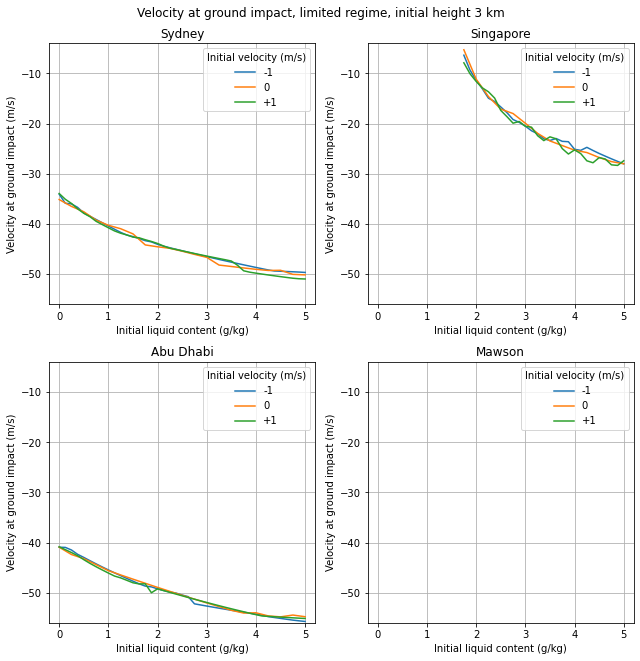

In [197]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        liquid_ratio*1e3,
        initial_velocity_down[sounding.name].hit_ground_velocity,
        label='-1')
    ax.plot(
        liquid_ratio_zero*1e3,
        initial_velocity_zero[sounding.name].hit_ground_velocity,
        label='0')
    ax.plot(
        liquid_ratio*1e3,
        initial_velocity_up[sounding.name].hit_ground_velocity,
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(-0.2, 5.2)
    ax.set_ylim(-56, -4)
    ax.set(
        xlabel='Initial liquid content (g/kg)',
        ylabel='Velocity at ground impact (m/s)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Velocity at ground impact, limited regime, initial height 3 km', y=1.015)
fig.savefig(
    fig_path + 'limited_ground_impact_velocity_3km_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

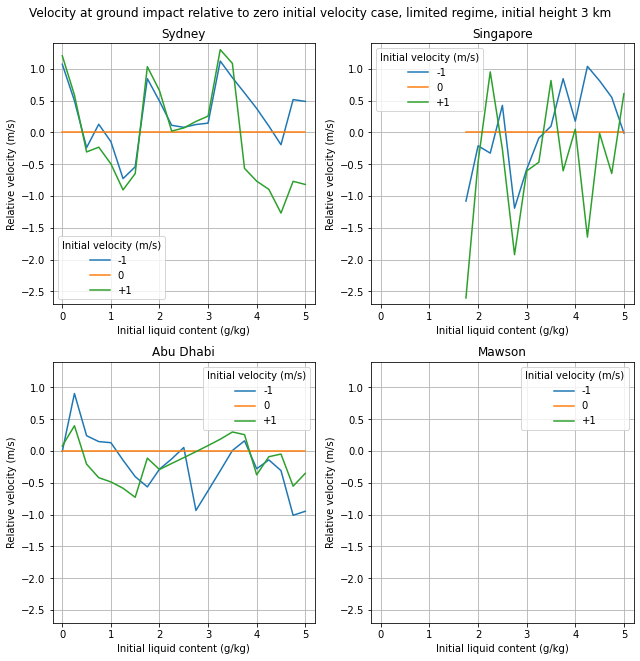

In [210]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        liquid_ratio[::2]*1e3,
        (initial_velocity_down[sounding.name].hit_ground_velocity[::2]
         - initial_velocity_zero[sounding.name].hit_ground_velocity),
        label='-1')
    ax.plot(
        liquid_ratio_zero*1e3,
        (initial_velocity_zero[sounding.name].hit_ground_velocity
         - initial_velocity_zero[sounding.name].hit_ground_velocity),
        label='0')
    ax.plot(
        liquid_ratio[::2]*1e3,
        (initial_velocity_up[sounding.name].hit_ground_velocity[::2]
         - initial_velocity_zero[sounding.name].hit_ground_velocity),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(-0.2, 5.2)
    ax.set_ylim(-2.7, 1.4)
    ax.set(
        xlabel='Initial liquid content (g/kg)',
        ylabel='Relative velocity (m/s)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Velocity at ground impact relative to zero initial velocity case, '
    'limited regime, initial height 3 km', y=1.015)
fig.savefig(
    fig_path + 'limited_ground_impact_velocity_3km_comparison_relative.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

### Time to reach ground

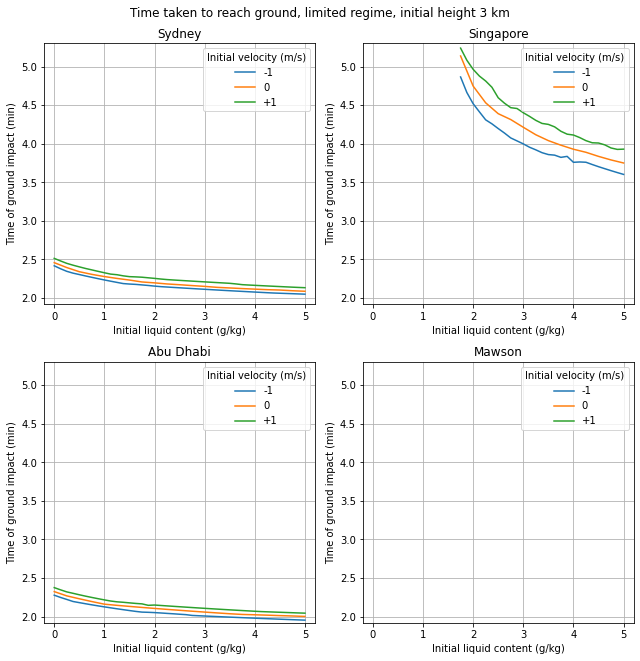

In [212]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        liquid_ratio*1e3,
        initial_velocity_down[sounding.name].hit_ground_time.to(units.min),
        label='-1')
    ax.plot(
        liquid_ratio_zero*1e3,
        initial_velocity_zero[sounding.name].hit_ground_time.to(units.min),
        label='0')
    ax.plot(
        liquid_ratio*1e3,
        initial_velocity_up[sounding.name].hit_ground_time.to(units.min),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(-0.2, 5.2)
    ax.set_ylim(1.92, 5.3)
    ax.set(
        xlabel='Initial liquid content (g/kg)',
        ylabel='Time of ground impact (min)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Time taken to reach ground, limited regime, initial height 3 km', y=1.015)
fig.savefig(
    fig_path + 'limited_ground_impact_time_3km_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

### Minimum height

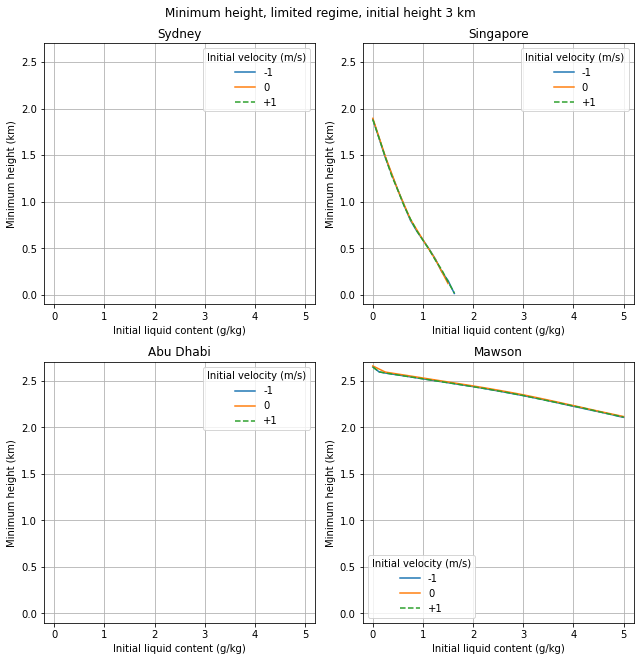

In [217]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        liquid_ratio*1e3,
        initial_velocity_down[sounding.name].min_height.to(units.km),
        label='-1')
    ax.plot(
        liquid_ratio_zero*1e3,
        initial_velocity_zero[sounding.name].min_height.to(units.km),
        label='0')
    ax.plot(
        liquid_ratio*1e3,
        initial_velocity_up[sounding.name].min_height.to(units.km), '--',
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(-0.2, 5.2)
    ax.set_ylim(-0.1, 2.7)
    ax.set(
        xlabel='Initial liquid content (g/kg)',
        ylabel='Minimum height (km)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Minimum height, limited regime, initial height 3 km',
    y=1.015)
fig.savefig(
    fig_path + 'limited_min_height_3km_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

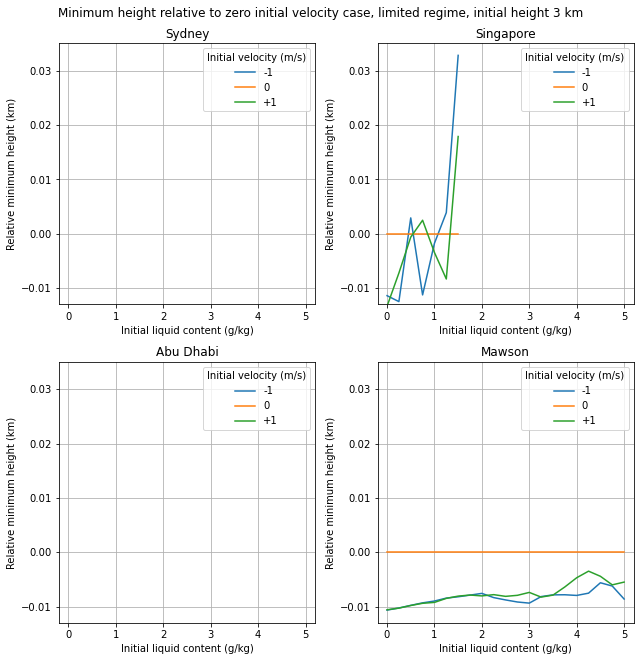

In [220]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        liquid_ratio[::2]*1e3,
        (initial_velocity_down[sounding.name].min_height.to(units.km)[::2]
         - initial_velocity_zero[sounding.name].min_height.to(units.km)),
        label='-1')
    ax.plot(
        liquid_ratio_zero*1e3,
        (initial_velocity_zero[sounding.name].min_height.to(units.km)
         - initial_velocity_zero[sounding.name].min_height.to(units.km)),
        label='0')
    ax.plot(
        liquid_ratio[::2]*1e3,
        (initial_velocity_up[sounding.name].min_height.to(units.km)[::2]
         - initial_velocity_zero[sounding.name].min_height.to(units.km)),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(-0.2, 5.2)
    ax.set_ylim(-0.013, 0.035)
    ax.set(
        xlabel='Initial liquid content (g/kg)',
        ylabel='Relative minimum height (km)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Minimum height relative to zero initial velocity case, limited regime, '
    'initial height 3 km', y=1.015)
fig.savefig(
    fig_path + 'limited_min_height_3km_comparison_relative.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

### Time to reach minimum height

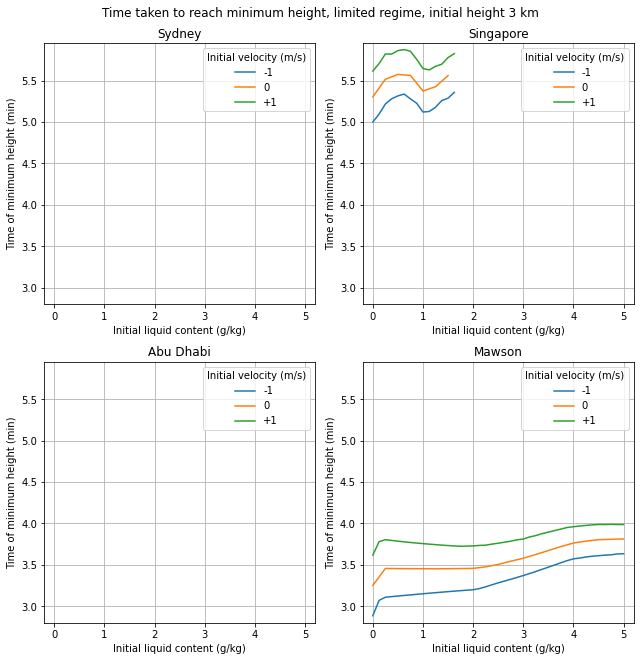

In [223]:
fig = plt.figure(figsize=(9,9))

for i, sounding in enumerate([sydney, singapore, abu_dhabi, mawson]):
    ax = fig.add_subplot(221+i)
    ax.plot(
        liquid_ratio*1e3,
        initial_velocity_down[sounding.name].min_height_time.to(units.min),
        label='-1')
    ax.plot(
        liquid_ratio_zero*1e3,
        initial_velocity_zero[sounding.name].min_height_time.to(units.min),
        label='0')
    ax.plot(
        liquid_ratio*1e3,
        initial_velocity_up[sounding.name].min_height_time.to(units.min),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(-0.2, 5.2)
    ax.set_ylim(2.8, 5.95)
    ax.set(
        xlabel='Initial liquid content (g/kg)',
        ylabel='Time of minimum height (min)',
        title=sounding.name)
    ax.grid()
fig.tight_layout()
fig.suptitle(
    'Time taken to reach minimum height, limited regime, initial height 3 km',
    y=1.015)
fig.savefig(
    fig_path + 'limited_min_height_time_3km_comparison.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

## Conclusions

- The velocity at ground impact is not systematically increased or decreased by giving the parcel an upward or downward initial velocity, but the effect of an initial upward velocity is quite similar to that of an initial downward velocity of the same magnitude.
- The greater the initial upward velocity, the longer the parcel takes to reach the ground or its minimum height. This is uniform across the soundings and for different initial conditions.
- Giving the parcel nonzero initial velocity almost always causes it to reach a lower minimum height (if it does not reach the ground). The effect of an upward initial velocity is almost identical to that of a downward initial velocity of the same magnitude.
    - We can justify this by considering the somewhat analogous case of a harmonic oscillator, e.g. a mass hanging from the ceiling on a spring. The initial kinetic energy is independent of the direction of the initial velocity, and if two identical masses are released from the same height, one nudged upwards and the other downwards, they will have the same (conserved) total energy. They will therefore reach the same maximum and minimum heights (although at different times).